# HTTP CSIC 2010 Dataset Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
normal_traffic_train = 'HTTPtraffic/normalTrafficTraining.txt'
normal_traffic_test = 'HTTPtraffic/normalTrafficTest.txt'
anomalous_traffic_test = 'HTTPtraffic/anomalousTrafficTest.txt'

### Parsing the Text File

In [3]:
def parseFile(filename):
    fptr = open(filename)
    block = ""

    request_type = []
    urls = []
    hosts = []
    user_agent = []
    pragma = []
    cache_control = []
    accept = []
    accept_encoding = []
    accept_charset = []
    accept_language = []
    cookie = []
    conn = []
    content_type = []
    content_len = []
    
    count = 0

    for line in fptr.readlines():
        req = 'NULL'
        url = 'NULL'
        http = 'NULL'
        uag = 'NULL'
        p = 'NULL'
        cc = 'NULL'
        a = 'NULL'
        ae = 'NULL'
        ac = 'NULL'
        al = 'NULL'
        ckie = 'NULL'
        c = 'NULL'
        cont_type = 'NULL'
        cont_len = 'NULL'
        block += line
        if line == "\n":
            count += 1
            if count == 2:
                count = 0
                block = ""
                continue
            data = block.split("\n")
            for i in range(len(data)):
                d = data[i].strip()
                if d.startswith("GET") or d.startswith("POST") or d.startswith("PUT"):
                    req, url, http = d.split(" ")
                elif d.startswith("User-Agent: "):
                    uag = d[12:]
                elif d.startswith("Pragma: "):
                    p = d[8:]
                elif d.startswith("Cache-Control: "):
                    cc = d[15:]
                elif d.startswith("Accept: "):
                    a = d[8:]
                elif d.startswith("Accept-Encoding: "):
                    ae = d[17:]
                elif d.startswith("Accept-Charset: "):
                    ac = d[16:]
                elif d.startswith("Accept-Language"):
                    al = d[17:]
                elif d.startswith("Cookie: "):
                    ckie = d[8:]
                elif d.startswith("Connection: "):
                    c = d[12:]
                elif d.startswith("Content-Type: "):
                    cont_type = d[14:]
                elif d.startswith('Content-Length: '):
                    cont_len = d[16:]
            
            request_type.append(req)
            urls.append(req + " " + url)
            host = data[8][6:]
            
            hosts.append(host)
            user_agent.append(uag)
            pragma.append(p)
            cache_control.append(cc)
            accept.append(a)
            accept_encoding.append(ae)
            accept_charset.append(ac)
            accept_language.append(al)
            cookie.append(ckie)
            conn.append(c)
            content_type.append(cont_type)
            content_len.append(cont_len)
            
            block = ""
            
    http_traffic_data = pd.DataFrame(data=list(zip(request_type, urls, hosts, user_agent, pragma, cache_control, accept, accept_encoding, accept_charset, accept_language, cookie, conn, content_type, content_len)), columns=["method", "path", "host", "user_agent", "pragma", "cache_control", "accept", "accept_enc", "accept_char", "accept_lang", "cookie", "conn", "content_type", "content_len"])
    
    return http_traffic_data

### Parsing the Normal Traffic File

In [4]:
df_normal_traffic = parseFile(normal_traffic_train)
df_normal_traffic

,method,path,host,user_agent,pragma,cache_control,accept,accept_enc,accept_char,accept_lang,cookie,conn,content_type,content_len
0,GET,GET http://localhost:8080/tienda1/index.jsp,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,close,NULL,NULL
1,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,close,NULL,NULL
2,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=933185092E0B668B90676E0A2B0767AF,close,application/x-www-form-urlencoded,68
3,GET,GET http://localhost:8080/tienda1/publico/aute...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,close,NULL,NULL
4,POST,POST http://localhost:8080/tienda1/publico/aut...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,close,application/x-www-form-urlencoded,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,GET,GET http://localhost:8080/tienda1/imagenes/2.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=6D4D8AF3FC2C291CDBA2E1B39A266617,close,NULL,NULL
35996,GET,GET http://localhost:8080/tienda1/imagenes/3.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=3AD01D093A41EE8156B8549E5CB5247A,close,NULL,NULL
35997,GET,GET http://localhost:8080/tienda1/imagenes/cme...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=DF85B4F0BDAB8579850FB4858032811D,close,NULL,NULL
35998,GET,GET http://localhost:8080/tienda1/imagenes/log...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=AC79ED01AD6C72CD0CAFA94171438750,close,NULL,NULL


In [5]:
df_normal_traffic["label"] = 0
df_normal_traffic

,method,path,host,user_agent,pragma,cache_control,accept,accept_enc,accept_char,accept_lang,cookie,conn,content_type,content_len,label
0,GET,GET http://localhost:8080/tienda1/index.jsp,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,close,NULL,NULL,0
1,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,close,NULL,NULL,0
2,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=933185092E0B668B90676E0A2B0767AF,close,application/x-www-form-urlencoded,68,0
3,GET,GET http://localhost:8080/tienda1/publico/aute...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,close,NULL,NULL,0
4,POST,POST http://localhost:8080/tienda1/publico/aut...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,close,application/x-www-form-urlencoded,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,GET,GET http://localhost:8080/tienda1/imagenes/2.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=6D4D8AF3FC2C291CDBA2E1B39A266617,close,NULL,NULL,0
35996,GET,GET http://localhost:8080/tienda1/imagenes/3.gif,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=3AD01D093A41EE8156B8549E5CB5247A,close,NULL,NULL,0
35997,GET,GET http://localhost:8080/tienda1/imagenes/cme...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=DF85B4F0BDAB8579850FB4858032811D,close,NULL,NULL,0
35998,GET,GET http://localhost:8080/tienda1/imagenes/log...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=AC79ED01AD6C72CD0CAFA94171438750,close,NULL,NULL,0


### Parsing the Anomalous Traffic File

In [6]:
df_anomalous_traffic = parseFile(anomalous_traffic_test)
df_anomalous_traffic["label"] = 1
df_anomalous_traffic

,method,path,host,user_agent,pragma,cache_control,accept,accept_enc,accept_char,accept_lang,cookie,conn,content_type,content_len,label
0,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=B92A8B48B9008CD29F622A994E0F650D,close,NULL,NULL,1
1,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=AE29AEEBDE479D5E1A18B4108C8E3CE0,close,application/x-www-form-urlencoded,146,1
2,GET,GET http://localhost:8080/tienda1/publico/anad...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=F563B5262843F12ECAE41815ABDEEA54,close,NULL,NULL,1
3,POST,POST http://localhost:8080/tienda1/publico/ana...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=3B654D6DF7F1466EE80D7F756B00E5D1,close,application/x-www-form-urlencoded,77,1
4,GET,GET http://localhost:8080/asf-logo-wide.gif~,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=51A7470173188BBB993947F2283059E4,close,NULL,NULL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25060,GET,GET http://localhost:8080/tienda1/miembros/edi...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,close,NULL,NULL,1
25061,POST,POST http://localhost:8080/tienda1/miembros/ed...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,close,application/x-www-form-urlencoded,255,1
25062,GET,GET http://localhost:8080/tienda1/miembros/edi...,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,close,NULL,NULL,1
25063,GET,GET http://localhost:8080/tienda1/imagenes/3.gif/,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,NULL,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,close,NULL,NULL,1


### Combining the Normal Traffic Dataframe and the Anomalous Traffic Dataframe

In [7]:
df_all_requests = pd.concat([df_normal_traffic, df_anomalous_traffic], ignore_index=True, sort='False')
df_all_requests

C:\Users\srile\AppData\Local\Temp\ipykernel_5108\720350560.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_all_requests = pd.concat([df_normal_traffic, df_anomalous_traffic], ignore_index=True, sort='False')


,accept,accept_char,accept_enc,accept_lang,cache_control,conn,content_len,content_type,cookie,host,label,method,path,pragma,user_agent
0,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,localhost:8080,0,GET,GET http://localhost:8080/tienda1/index.jsp,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
1,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/anad...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
2,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,68,application/x-www-form-urlencoded,JSESSIONID=933185092E0B668B90676E0A2B0767AF,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/ana...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
3,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/aute...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
4,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,63,application/x-www-form-urlencoded,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/aut...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,localhost:8080,1,GET,GET http://localhost:8080/tienda1/miembros/edi...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
61061,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,255,application/x-www-form-urlencoded,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,localhost:8080,1,POST,POST http://localhost:8080/tienda1/miembros/ed...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
61062,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,localhost:8080,1,GET,GET http://localhost:8080/tienda1/miembros/edi...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
61063,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,localhost:8080,1,GET,GET http://localhost:8080/tienda1/imagenes/3.gif/,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...


### Understanding which feature influences the output label

In [8]:
pd.crosstab(df_all_requests.host, df_all_requests.label)

label,0,1
host,,
localhost:8080,36000,24668
localhost:9090,0,397


In [9]:
pd.crosstab(df_all_requests.content_type, df_all_requests.label)

label,0,1
content_type,,
NULL,28000,15088
application/x-www-form-urlencoded,8000,9977


In [10]:
pd.crosstab(df_all_requests.accept, df_all_requests.label)

label,0,1
accept,,
NULL,0,397
"text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5",36000,24668


In [11]:
pd.crosstab(df_all_requests.accept_enc, df_all_requests.label)

label,0,1
accept_enc,,
"x-gzip, x-deflate, gzip, deflate",36000,25065


In [12]:
pd.crosstab(df_all_requests.accept_char, df_all_requests.label)

label,0,1
accept_char,,
"utf-8, utf-8;q=0.5, *;q=0.5",36000,25065


In [13]:
pd.crosstab(df_all_requests.accept_lang, df_all_requests.label)

label,0,1
accept_lang,,
en,36000,25065


In [14]:
pd.crosstab(df_all_requests.cache_control, df_all_requests.label)

label,0,1
cache_control,,
NULL,36000,25065


### Conclusion:
- We see that all columns except 'cookie', 'content_type', 'content_length', 'host', 'accept' have only one unique value. Therefore, they do not contribute any information for classification.


- The column 'content_type' has two possible values, because of the absence of content in the GET method. So it also does not contribute information about the anomaly.


- The columns 'accept' and 'host' have two possible values and only depend whether the method is PUT or not. So it also does not contribute information about the anomaly.


- The 'cookie' column has unique sessionID for each rows, and it is not usable in our classification.


- The 'content_len' is similar to 'content_type' and it is present only for the POST and PUT methods. Its information is contained on the message body.


- From this we can understand, that content_type is NULL for GET method type

**_From this we can deduce that we can classify only using the method field and the path._**

In [15]:
df_all_requests.head()

,accept,accept_char,accept_enc,accept_lang,cache_control,conn,content_len,content_type,cookie,host,label,method,path,pragma,user_agent
0,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,localhost:8080,0,GET,GET http://localhost:8080/tienda1/index.jsp,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
1,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/anad...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
2,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,68,application/x-www-form-urlencoded,JSESSIONID=933185092E0B668B90676E0A2B0767AF,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/ana...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
3,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,NULL,NULL,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,localhost:8080,0,GET,GET http://localhost:8080/tienda1/publico/aute...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...
4,"text/xml,application/xml,application/xhtml+xml...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,NULL,close,63,application/x-www-form-urlencoded,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,localhost:8080,0,POST,POST http://localhost:8080/tienda1/publico/aut...,no-cache,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...


In [16]:
df = df_all_requests[['path', 'label']]
df.head()

,path,label
0,GET http://localhost:8080/tienda1/index.jsp,0
1,GET http://localhost:8080/tienda1/publico/anad...,0
2,POST http://localhost:8080/tienda1/publico/ana...,0
3,GET http://localhost:8080/tienda1/publico/aute...,0
4,POST http://localhost:8080/tienda1/publico/aut...,0


In [17]:
# Get Tokens
def getTokens(url):
    url = url.lower()
    url = url.replace(' ', '/')
    url = url.replace('.', '/')
    url = url.replace('=', '/')
    url = url.replace('&', '/')
    url = url.replace('?', '/')
    url = url.replace('-', '/')
    url = url.replace('@', '/')
    url = url.replace(':', '/')
    url = url.replace(';', '/')
    url = url.replace('%2f', '/')
    url = url.replace('%', '/')
    url = url.replace('+', '/')
    url = url.replace('$', '/')
    url = url.replace('#', '/')
    url = url.replace('~', '/')
    url = url.replace(',', '/')
    url = url.replace('(', '/')
    url = url.replace(')', '/')
    url = url.replace('[', '/')
    url = url.replace(']', '/')
    url = url.replace('{', '/')
    url = url.replace('}', '/')
    url = url.replace('_', '/')
    url = url.replace('!', '/')
    url = url.replace('*', '/')
    url = url.replace("'", '/')
    url = url.replace('|', '/')
    url = url.replace('>', '/')
    url = url.replace('<', '/')
    url = url.replace('\\', '/')
    urls = url.split('/')
    urls = list(filter(lambda a: a != ' ' and a != '', urls))
    urls = list([str(u) for u in urls])
    return urls

df['path'] = df['path'].apply(lambda x : str(x))
df['url_tokens'] = df['path'].apply(lambda x: getTokens(x))

df.head()

C:\Users\srile\AppData\Local\Temp\ipykernel_5108\2798982250.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['path'] = df['path'].apply(lambda x : str(x))
C:\Users\srile\AppData\Local\Temp\ipykernel_5108\2798982250.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['url_tokens'] = df['path'].apply(lambda x: getTokens(x))


,path,label,url_tokens
0,GET http://localhost:8080/tienda1/index.jsp,0,"[get, http, localhost, 8080, tienda1, index, jsp]"
1,GET http://localhost:8080/tienda1/publico/anad...,0,"[get, http, localhost, 8080, tienda1, publico,..."
2,POST http://localhost:8080/tienda1/publico/ana...,0,"[post, http, localhost, 8080, tienda1, publico..."
3,GET http://localhost:8080/tienda1/publico/aute...,0,"[get, http, localhost, 8080, tienda1, publico,..."
4,POST http://localhost:8080/tienda1/publico/aut...,0,"[post, http, localhost, 8080, tienda1, publico..."


In [18]:
from gensim.models import Word2Vec

w2vmodel = Word2Vec(vector_size=300, min_count=1, window=5, workers=4)
w2vmodel.build_vocab(df['url_tokens'])
w2vmodel.train(df['url_tokens'], total_examples=w2vmodel.corpus_count, epochs=2)

(726882, 1583236)

In [19]:
w2vmodel.wv.key_to_index

{'localhost': 0,
 'http': 1,
 '8080': 2,
 'tienda1': 3,
 'jsp': 4,
 'get': 5,
 'publico': 6,
 'post': 7,
 'miembros': 8,
 'b1': 9,
 'imagenes': 10,
 'registro': 11,
 'modo': 12,
 'entrar': 13,
 'nombre': 14,
 'login': 15,
 'gif': 16,
 '2c': 17,
 'vaciar': 18,
 'carrito': 19,
 'anadir': 20,
 'autenticar': 21,
 'editar': 22,
 'pagar': 23,
 'ciudad': 24,
 'registrar': 25,
 'provincia': 26,
 'password': 27,
 'direccion': 28,
 'apellidos': 29,
 'dni': 30,
 'cp': 31,
 'email': 32,
 'ntc': 33,
 'precio': 34,
 'global': 35,
 'jpg': 36,
 'caracteristicas': 37,
 'id': 38,
 '1': 39,
 '2': 40,
 '27': 41,
 'a': 42,
 'logo': 43,
 'al': 44,
 'f1adir': 45,
 'cantidad': 46,
 'remember': 47,
 'pwd': 48,
 'insertar': 49,
 'index': 50,
 'de': 51,
 '3': 52,
 'credenciales': 53,
 'incorrectas': 54,
 '270': 55,
 'c': 56,
 'b2': 57,
 'errormsg': 58,
 'wide': 59,
 'asf': 60,
 'f3n': 61,
 'on': 62,
 'calle': 63,
 'confirmar': 64,
 'pasar': 65,
 'por': 66,
 'off': 67,
 'css': 68,
 'estilos': 69,
 'castro': 70,
 

In [20]:
count = 0
vectors = []
for word in w2vmodel.wv.key_to_index:
    index = w2vmodel.wv.key_to_index[word]
    vectors.append(w2vmodel.wv[index])

vectors[:3]

[array([ 7.00834572e-01,  3.75720382e-01, -8.65295589e-01, -1.01037093e-01,
        -2.51280522e+00, -1.96869904e-03, -4.90151122e-02,  1.33140910e+00,
        -2.75603473e-01,  4.19315815e-01,  1.39175355e+00,  3.71887714e-01,
         7.81857967e-01,  6.07725203e-01,  4.21203852e-01,  9.03773904e-02,
         4.55252349e-01, -1.19531997e-01,  1.24835169e+00, -6.61472261e-01,
         5.87826192e-01,  2.49765903e-01, -3.97806875e-02,  8.89704585e-01,
        -4.69999671e-01, -4.84951496e-01,  9.02595401e-01,  5.20071328e-01,
         8.16452444e-01,  3.35848749e-01, -2.99167842e-01, -1.49478149e+00,
        -1.23967491e-01, -8.16251874e-01,  5.07723451e-01,  2.80536488e-02,
         2.84778148e-01, -7.94711173e-01, -7.97302306e-01,  5.23905814e-01,
        -1.28306508e+00,  1.73431623e+00,  7.90597498e-01,  1.27484071e+00,
         2.74188966e-01,  1.16389580e-02, -7.33735204e-01,  7.59566963e-01,
        -8.18893611e-01,  4.63688076e-02, -7.29975760e-01,  2.01119494e+00,
        -6.9

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ' '.join([u for url in df['url_tokens'] for u in url])
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([corpus])

tfidf_dict = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))

In [22]:
tfidf_matrix.toarray()

array([[6.78906120e-06, 6.78906120e-06, 1.35781224e-05, ...,
        9.50468569e-05, 6.78906120e-06, 6.78906120e-06]])

In [23]:
words = vectorizer.get_feature_names_out()
scores = tfidf_matrix.toarray()[0]
d = {'Words': words, 'TFIDF Scores': scores}
tfidf_dataframe = pd.DataFrame(d)
tfidf_dataframe[tfidf_dataframe['Words']=='http']

,Words,TFIDF Scores
22807,http,0.414574


In [24]:
tfidf_weighted_vector = {}
errors = []
count = 0
for i in range(len(vectors)):
    try:
        v = vectors[i]
        word = w2vmodel.wv.index_to_key[i]
        tfidf = tfidf_dict[str(word)]
#         weighted_vector[word] = v*tfidf_dict[str(word)]
        tfidf_weighted_vector[word] = np.array(list(map(lambda e: e * tfidf, v)))
    except KeyError:
        tfidf_weighted_vector[word] = np.random.uniform(0,1,300)

In [25]:
tfidf_weighted_vector['http']

array([ 0.07136997,  0.07831444, -0.52243245, -0.23181061, -0.71146708,
        0.09629364,  0.0347936 ,  0.32557455, -0.17444742,  0.00958007,
        0.46576679,  0.15186345,  0.35948798,  0.01498933,  0.21766872,
        0.12461389,  0.35947246, -0.05717205,  0.58462136, -0.09152074,
        0.04656642, -0.13474364, -0.08387915,  0.37893335, -0.48416147,
       -0.25987071,  0.27570624,  0.22626344,  0.54399615,  0.09455357,
        0.30024294, -0.34117216, -0.28992448,  0.06073494,  0.17660522,
        0.11297482,  0.14325174, -0.26791565, -0.37297136,  0.51967703,
       -0.11728957,  0.61535065,  0.69586035,  0.47761683,  0.18998862,
        0.03176642, -0.0623361 ,  0.01114367, -0.47940152, -0.01444841,
       -0.13558617,  0.6268831 , -0.2157711 , -0.34449709,  0.19911655,
       -0.50357836, -0.30955392,  0.35078827,  0.50338528, -0.17597659,
       -0.1321992 ,  0.04297882,  0.09926268,  0.54622401,  0.38543306,
       -0.03293341,  0.26566427,  0.53105386, -0.30689758,  0.02

In [26]:
def create_paragraph_vectors(tokens):
    temp = []
    for i in range(300):
        sum = 0
        for token in tokens:
            try:
                sum += tfidf_weighted_vector[token][i]
            except KeyError as e:
                sum += np.random.uniform(0,1,300)
        temp.append(sum/len(tokens))
    paragraph_vector = np.asarray(temp, dtype=np.float32)
    return paragraph_vector

example_url = ['get', 'http', 'localhost', '8080', 'tienda1', 'index', 'jsp']

res = create_paragraph_vectors(example_url)
res

array([ 0.18649226,  0.02821234, -0.35468078, -0.09279293, -0.6534946 ,
        0.06823684, -0.02901649,  0.26221716, -0.16516341,  0.12459866,
        0.3705005 ,  0.13172029,  0.2067478 ,  0.18111409,  0.05365403,
        0.06161235,  0.2637843 ,  0.02314137,  0.46141788, -0.24803455,
        0.09861618,  0.02789531, -0.00507643,  0.19581537, -0.18771927,
       -0.15264472,  0.15897799,  0.14653574,  0.26628098,  0.12243517,
        0.06053227, -0.28382522, -0.09695248, -0.04192381,  0.02781381,
        0.02233296, -0.05735522, -0.22967862, -0.24371883,  0.18867394,
       -0.23294209,  0.48180264,  0.3802045 ,  0.31715783,  0.10348681,
        0.063626  , -0.25238085,  0.03601292, -0.32416326,  0.07963751,
       -0.18569058,  0.50854474, -0.20917627, -0.17515177,  0.21765421,
       -0.47818   , -0.25561032,  0.08994908,  0.23654316, -0.0983411 ,
       -0.12905349, -0.11579017, -0.06587628,  0.34289342,  0.2992335 ,
        0.04336014,  0.24070811,  0.31872293, -0.3217955 ,  0.12

In [27]:
df['paragraph_vector'] = df['url_tokens'].apply(lambda x: create_paragraph_vectors(x))
df.head()

C:\Users\srile\AppData\Local\Temp\ipykernel_5108\2056446762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paragraph_vector'] = df['url_tokens'].apply(lambda x: create_paragraph_vectors(x))


,path,label,url_tokens,paragraph_vector
0,GET http://localhost:8080/tienda1/index.jsp,0,"[get, http, localhost, 8080, tienda1, index, jsp]","[0.18649226, 0.028212342, -0.35468078, -0.0927..."
1,GET http://localhost:8080/tienda1/publico/anad...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.081501685, 0.046167023, -0.09352417, 0.0165..."
2,POST http://localhost:8080/tienda1/publico/ana...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.17180538, 0.03209762, -0.3192913, -0.081100..."
3,GET http://localhost:8080/tienda1/publico/aute...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.0718231, 0.018425977, -0.15846725, -0.04091..."
4,POST http://localhost:8080/tienda1/publico/aut...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.16764428, 0.029155165, -0.31738785, -0.0800..."


In [28]:
cols = ['v'+str(i) for i in range(300)]

In [29]:
import warnings
warnings.filterwarnings('ignore')

df[cols] = pd.DataFrame(df['paragraph_vector'].to_list(), index=df.index)
df.head()

,path,label,url_tokens,paragraph_vector,v0,v1,v2,v3,v4,v5,...,v290,v291,v292,v293,v294,v295,v296,v297,v298,v299
0,GET http://localhost:8080/tienda1/index.jsp,0,"[get, http, localhost, 8080, tienda1, index, jsp]","[0.18649226, 0.028212342, -0.35468078, -0.0927...",0.186492,0.028212,-0.354681,-0.092793,-0.653495,0.068237,...,0.126978,0.340714,-0.284620,0.131643,0.342504,0.049094,-0.281704,0.199327,-0.109099,-0.058397
1,GET http://localhost:8080/tienda1/publico/anad...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.081501685, 0.046167023, -0.09352417, 0.0165...",0.081502,0.046167,-0.093524,0.016540,-0.179215,0.090663,...,0.095183,0.192259,-0.024391,0.086327,0.185660,0.086123,-0.056520,0.102422,0.005538,0.002719
2,POST http://localhost:8080/tienda1/publico/ana...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.17180538, 0.03209762, -0.3192913, -0.081100...",0.171805,0.032098,-0.319291,-0.081101,-0.542945,0.064726,...,0.088652,0.325472,-0.248085,0.136920,0.337232,0.061545,-0.253936,0.152327,-0.097287,-0.053456
3,GET http://localhost:8080/tienda1/publico/aute...,0,"[get, http, localhost, 8080, tienda1, publico,...","[0.0718231, 0.018425977, -0.15846725, -0.04091...",0.071823,0.018426,-0.158467,-0.040914,-0.268631,0.024059,...,0.049976,0.171474,-0.112698,0.082661,0.166648,0.049509,-0.125941,0.066252,-0.052571,-0.028957
4,POST http://localhost:8080/tienda1/publico/aut...,0,"[post, http, localhost, 8080, tienda1, publico...","[0.16764428, 0.029155165, -0.31738785, -0.0800...",0.167644,0.029155,-0.317388,-0.080086,-0.540368,0.065102,...,0.090175,0.324868,-0.249119,0.137730,0.335479,0.065878,-0.254059,0.149492,-0.101311,-0.050699


In [30]:
X = df.iloc[:, 4:]
Y = df['label']

In [31]:
X.shape

(61065, 300)

In [32]:
Y.shape

(61065,)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48852, 300)
(12213, 300)
(48852,)
(12213,)


### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logRegClf = LogisticRegression(random_state=0)
logRegClf.fit(X_train, Y_train)

Y_pred = logRegClf.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print(score)
print(classification_report(Y_test, Y_pred))

0.7189060836813231
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      7148
           1       0.67      0.65      0.66      5065

    accuracy                           0.72     12213
   macro avg       0.71      0.71      0.71     12213
weighted avg       0.72      0.72      0.72     12213



### KMeans

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
Y_kmeans_pred = kmeans.predict(X_test)
kmeans_score = accuracy_score(Y_test, Y_kmeans_pred)
print(kmeans_score)
print(classification_report(Y_test, Y_kmeans_pred))

0.6382543191680996
              precision    recall  f1-score   support

           0       0.64      0.86      0.74      7148
           1       0.62      0.33      0.43      5065

    accuracy                           0.64     12213
   macro avg       0.63      0.59      0.58     12213
weighted avg       0.63      0.64      0.61     12213



### Cat Boost

In [36]:
from catboost import CatBoostClassifier

cbmodel = CatBoostClassifier()
cbmodel.fit(X_train, Y_train)

Y_cb_pred = cbmodel.predict(X_test)

Learning rate set to 0.054211
0:	learn: 0.6295232	total: 316ms	remaining: 5m 16s
1:	learn: 0.5838609	total: 447ms	remaining: 3m 42s
2:	learn: 0.5440241	total: 577ms	remaining: 3m 11s
3:	learn: 0.5133257	total: 702ms	remaining: 2m 54s
4:	learn: 0.4864986	total: 842ms	remaining: 2m 47s
5:	learn: 0.4654103	total: 986ms	remaining: 2m 43s
6:	learn: 0.4496588	total: 1.13s	remaining: 2m 39s
7:	learn: 0.4335063	total: 1.26s	remaining: 2m 36s
8:	learn: 0.4227657	total: 1.39s	remaining: 2m 33s
9:	learn: 0.4112834	total: 1.52s	remaining: 2m 31s
10:	learn: 0.4020333	total: 1.71s	remaining: 2m 34s
11:	learn: 0.3945617	total: 1.85s	remaining: 2m 32s
12:	learn: 0.3857399	total: 1.99s	remaining: 2m 30s
13:	learn: 0.3810798	total: 2.12s	remaining: 2m 29s
14:	learn: 0.3766315	total: 2.24s	remaining: 2m 27s
15:	learn: 0.3727641	total: 2.37s	remaining: 2m 25s
16:	learn: 0.3687658	total: 2.49s	remaining: 2m 23s
17:	learn: 0.3651061	total: 2.61s	remaining: 2m 22s
18:	learn: 0.3612769	total: 2.74s	remaining:

158:	learn: 0.2927406	total: 20s	remaining: 1m 45s
159:	learn: 0.2926219	total: 20.1s	remaining: 1m 45s
160:	learn: 0.2925359	total: 20.2s	remaining: 1m 45s
161:	learn: 0.2924274	total: 20.3s	remaining: 1m 45s
162:	learn: 0.2923573	total: 20.5s	remaining: 1m 45s
163:	learn: 0.2922818	total: 20.6s	remaining: 1m 44s
164:	learn: 0.2921820	total: 20.7s	remaining: 1m 44s
165:	learn: 0.2920868	total: 20.8s	remaining: 1m 44s
166:	learn: 0.2920183	total: 20.9s	remaining: 1m 44s
167:	learn: 0.2919160	total: 21.1s	remaining: 1m 44s
168:	learn: 0.2917884	total: 21.2s	remaining: 1m 44s
169:	learn: 0.2916868	total: 21.3s	remaining: 1m 44s
170:	learn: 0.2916078	total: 21.4s	remaining: 1m 43s
171:	learn: 0.2915447	total: 21.6s	remaining: 1m 43s
172:	learn: 0.2914958	total: 21.7s	remaining: 1m 43s
173:	learn: 0.2914176	total: 21.8s	remaining: 1m 43s
174:	learn: 0.2913161	total: 21.9s	remaining: 1m 43s
175:	learn: 0.2911859	total: 22s	remaining: 1m 43s
176:	learn: 0.2911184	total: 22.2s	remaining: 1m 4

315:	learn: 0.2761828	total: 38.9s	remaining: 1m 24s
316:	learn: 0.2761335	total: 39s	remaining: 1m 24s
317:	learn: 0.2760275	total: 39.1s	remaining: 1m 23s
318:	learn: 0.2759349	total: 39.3s	remaining: 1m 23s
319:	learn: 0.2758698	total: 39.4s	remaining: 1m 23s
320:	learn: 0.2757900	total: 39.5s	remaining: 1m 23s
321:	learn: 0.2757170	total: 39.6s	remaining: 1m 23s
322:	learn: 0.2756643	total: 39.7s	remaining: 1m 23s
323:	learn: 0.2756022	total: 39.8s	remaining: 1m 23s
324:	learn: 0.2755627	total: 40s	remaining: 1m 23s
325:	learn: 0.2754991	total: 40.1s	remaining: 1m 22s
326:	learn: 0.2754126	total: 40.2s	remaining: 1m 22s
327:	learn: 0.2753292	total: 40.3s	remaining: 1m 22s
328:	learn: 0.2752406	total: 40.4s	remaining: 1m 22s
329:	learn: 0.2751859	total: 40.5s	remaining: 1m 22s
330:	learn: 0.2750867	total: 40.7s	remaining: 1m 22s
331:	learn: 0.2750012	total: 40.8s	remaining: 1m 22s
332:	learn: 0.2749086	total: 40.9s	remaining: 1m 21s
333:	learn: 0.2748307	total: 41s	remaining: 1m 21s

473:	learn: 0.2662912	total: 57.9s	remaining: 1m 4s
474:	learn: 0.2662539	total: 58s	remaining: 1m 4s
475:	learn: 0.2662144	total: 58.1s	remaining: 1m 3s
476:	learn: 0.2661852	total: 58.2s	remaining: 1m 3s
477:	learn: 0.2661462	total: 58.3s	remaining: 1m 3s
478:	learn: 0.2660603	total: 58.4s	remaining: 1m 3s
479:	learn: 0.2660047	total: 58.6s	remaining: 1m 3s
480:	learn: 0.2659693	total: 58.7s	remaining: 1m 3s
481:	learn: 0.2659041	total: 58.8s	remaining: 1m 3s
482:	learn: 0.2658594	total: 58.9s	remaining: 1m 3s
483:	learn: 0.2658167	total: 59s	remaining: 1m 2s
484:	learn: 0.2657821	total: 59.2s	remaining: 1m 2s
485:	learn: 0.2657458	total: 59.3s	remaining: 1m 2s
486:	learn: 0.2657138	total: 59.4s	remaining: 1m 2s
487:	learn: 0.2656613	total: 59.5s	remaining: 1m 2s
488:	learn: 0.2656326	total: 59.6s	remaining: 1m 2s
489:	learn: 0.2655825	total: 59.8s	remaining: 1m 2s
490:	learn: 0.2655060	total: 59.9s	remaining: 1m 2s
491:	learn: 0.2654502	total: 1m	remaining: 1m 1s
492:	learn: 0.26539

633:	learn: 0.2597527	total: 1m 16s	remaining: 44.4s
634:	learn: 0.2597269	total: 1m 16s	remaining: 44.2s
635:	learn: 0.2596476	total: 1m 17s	remaining: 44.1s
636:	learn: 0.2596177	total: 1m 17s	remaining: 44s
637:	learn: 0.2595802	total: 1m 17s	remaining: 43.9s
638:	learn: 0.2595464	total: 1m 17s	remaining: 43.8s
639:	learn: 0.2595060	total: 1m 17s	remaining: 43.6s
640:	learn: 0.2594675	total: 1m 17s	remaining: 43.5s
641:	learn: 0.2594365	total: 1m 17s	remaining: 43.4s
642:	learn: 0.2593943	total: 1m 17s	remaining: 43.3s
643:	learn: 0.2593712	total: 1m 18s	remaining: 43.1s
644:	learn: 0.2593383	total: 1m 18s	remaining: 43s
645:	learn: 0.2593123	total: 1m 18s	remaining: 42.9s
646:	learn: 0.2592837	total: 1m 18s	remaining: 42.8s
647:	learn: 0.2592517	total: 1m 18s	remaining: 42.6s
648:	learn: 0.2592088	total: 1m 18s	remaining: 42.5s
649:	learn: 0.2591880	total: 1m 18s	remaining: 42.4s
650:	learn: 0.2591514	total: 1m 18s	remaining: 42.3s
651:	learn: 0.2591274	total: 1m 18s	remaining: 42.

789:	learn: 0.2548921	total: 1m 35s	remaining: 25.3s
790:	learn: 0.2548654	total: 1m 35s	remaining: 25.1s
791:	learn: 0.2548279	total: 1m 35s	remaining: 25s
792:	learn: 0.2547963	total: 1m 35s	remaining: 24.9s
793:	learn: 0.2547682	total: 1m 35s	remaining: 24.8s
794:	learn: 0.2547370	total: 1m 35s	remaining: 24.6s
795:	learn: 0.2547182	total: 1m 35s	remaining: 24.5s
796:	learn: 0.2546948	total: 1m 35s	remaining: 24.4s
797:	learn: 0.2546760	total: 1m 35s	remaining: 24.3s
798:	learn: 0.2546400	total: 1m 36s	remaining: 24.2s
799:	learn: 0.2546144	total: 1m 36s	remaining: 24s
800:	learn: 0.2545912	total: 1m 36s	remaining: 23.9s
801:	learn: 0.2545687	total: 1m 36s	remaining: 23.8s
802:	learn: 0.2545592	total: 1m 36s	remaining: 23.7s
803:	learn: 0.2545336	total: 1m 36s	remaining: 23.6s
804:	learn: 0.2545083	total: 1m 36s	remaining: 23.4s
805:	learn: 0.2544931	total: 1m 36s	remaining: 23.3s
806:	learn: 0.2544730	total: 1m 36s	remaining: 23.2s
807:	learn: 0.2544513	total: 1m 37s	remaining: 23.

945:	learn: 0.2511053	total: 1m 53s	remaining: 6.49s
946:	learn: 0.2510859	total: 1m 53s	remaining: 6.37s
947:	learn: 0.2510675	total: 1m 53s	remaining: 6.25s
948:	learn: 0.2510435	total: 1m 54s	remaining: 6.13s
949:	learn: 0.2510303	total: 1m 54s	remaining: 6.01s
950:	learn: 0.2510045	total: 1m 54s	remaining: 5.89s
951:	learn: 0.2509815	total: 1m 54s	remaining: 5.77s
952:	learn: 0.2509558	total: 1m 54s	remaining: 5.65s
953:	learn: 0.2509406	total: 1m 54s	remaining: 5.53s
954:	learn: 0.2509262	total: 1m 54s	remaining: 5.41s
955:	learn: 0.2509101	total: 1m 54s	remaining: 5.29s
956:	learn: 0.2508917	total: 1m 54s	remaining: 5.17s
957:	learn: 0.2508858	total: 1m 55s	remaining: 5.04s
958:	learn: 0.2508548	total: 1m 55s	remaining: 4.92s
959:	learn: 0.2508413	total: 1m 55s	remaining: 4.8s
960:	learn: 0.2508238	total: 1m 55s	remaining: 4.68s
961:	learn: 0.2508016	total: 1m 55s	remaining: 4.56s
962:	learn: 0.2507686	total: 1m 55s	remaining: 4.44s
963:	learn: 0.2507476	total: 1m 55s	remaining: 

In [37]:
cbscore = accuracy_score(Y_test, Y_cb_pred)
print(cbscore)
print(classification_report(Y_test, Y_cb_pred))

0.833292393351347
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7148
           1       0.78      0.83      0.81      5065

    accuracy                           0.83     12213
   macro avg       0.83      0.83      0.83     12213
weighted avg       0.84      0.83      0.83     12213



### CNN

In [69]:
X_cnn_train = X_train.values.reshape(48852, 300, 1)
X_cnn_train.shape

(48852, 300, 1)

In [70]:
X_cnn_test = X_test.values.reshape(12213, 300, 1)
X_cnn_test.shape

(12213, 300, 1)

In [71]:
cnnmodel = Sequential()
cnnmodel.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_cnn_train.shape[1],1)))
cnnmodel.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 1, activation='sigmoid'))

cnnmodel.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 300, 32)           128       
                                                                 
 conv1d_16 (Conv1D)          (None, 300, 64)           6208      
                                                                 
 conv1d_17 (Conv1D)          (None, 300, 128)          24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 150, 128)          0         
                                                                 
 flatten_5 (Flatten)         (None, 19200)             0         
                                                      

In [72]:
cnnmodel_history = cnnmodel.fit(X_cnn_train, Y_train, epochs=2, batch_size = 100, validation_data = (X_cnn_test, Y_test))

Epoch 1/2
489/489 [==============================] - 92s 185ms/step - loss: 0.5515 - accuracy: 0.6860 - val_loss: 0.4801 - val_accuracy: 0.7140
Epoch 2/2
489/489 [==============================] - 99s 203ms/step - loss: 0.4552 - accuracy: 0.7338 - val_loss: 0.4393 - val_accuracy: 0.7499


## SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

smote_oversample = SMOTE(random_state=2)
X_smote_oversampled, Y_smote_oversampled = smote_oversample.fit_resample(X, Y)

count = Y_smote_oversampled.value_counts()

In [39]:
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote_oversampled, Y_smote_oversampled, test_size=0.2, random_state=42)

print(X_smote_train.shape)
print(X_smote_test.shape)
print(Y_smote_train.shape)
print(Y_smote_test.shape)

(57600, 300)
(14400, 300)
(57600,)
(14400,)


### Logistic Regression

In [40]:
logRegClfSM = LogisticRegression(random_state=0)
logRegClfSM.fit(X_smote_train, Y_smote_train)

Y_smote_pred_LR = logRegClfSM.predict(X_smote_test)
smote_LR_score = accuracy_score(Y_smote_test, Y_smote_pred_LR)
print(smote_LR_score)
print(classification_report(Y_smote_test, Y_smote_pred_LR))

0.7416666666666667
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      7215
           1       0.70      0.84      0.77      7185

    accuracy                           0.74     14400
   macro avg       0.75      0.74      0.74     14400
weighted avg       0.75      0.74      0.74     14400



### KMeans

In [41]:
kmeansSM = KMeans(n_clusters=2, random_state=42)
kmeansSM.fit(X_smote_train)
Y_kmeans_pred_SM = kmeansSM.predict(X_smote_test)
kmeans_smote_score = accuracy_score(Y_smote_test, Y_kmeans_pred_SM)
print(kmeans_smote_score)
print(classification_report(Y_smote_test, Y_kmeans_pred_SM))

0.4000694444444444
              precision    recall  f1-score   support

           0       0.29      0.14      0.19      7215
           1       0.43      0.66      0.52      7185

    accuracy                           0.40     14400
   macro avg       0.36      0.40      0.36     14400
weighted avg       0.36      0.40      0.36     14400



### Cat Boost

In [42]:
cbmodelSM = CatBoostClassifier()
cbmodelSM.fit(X_smote_train, Y_smote_train)

Y_smote_pred_CB = cbmodel.predict(X_smote_test)
CB_smote_score = accuracy_score(Y_smote_test, Y_smote_pred_CB)

Learning rate set to 0.058161
0:	learn: 0.6208621	total: 163ms	remaining: 2m 42s
1:	learn: 0.5645574	total: 315ms	remaining: 2m 36s
2:	learn: 0.5260807	total: 457ms	remaining: 2m 31s
3:	learn: 0.4956533	total: 604ms	remaining: 2m 30s
4:	learn: 0.4728606	total: 750ms	remaining: 2m 29s
5:	learn: 0.4553714	total: 897ms	remaining: 2m 28s
6:	learn: 0.4419656	total: 1.05s	remaining: 2m 28s
7:	learn: 0.4291737	total: 1.24s	remaining: 2m 33s
8:	learn: 0.4153939	total: 1.39s	remaining: 2m 32s
9:	learn: 0.4061472	total: 1.52s	remaining: 2m 30s
10:	learn: 0.3971699	total: 1.65s	remaining: 2m 28s
11:	learn: 0.3914500	total: 1.8s	remaining: 2m 28s
12:	learn: 0.3865946	total: 1.95s	remaining: 2m 28s
13:	learn: 0.3810897	total: 2.09s	remaining: 2m 27s
14:	learn: 0.3771893	total: 2.21s	remaining: 2m 25s
15:	learn: 0.3737745	total: 2.36s	remaining: 2m 25s
16:	learn: 0.3710868	total: 2.5s	remaining: 2m 24s
17:	learn: 0.3678591	total: 2.64s	remaining: 2m 24s
18:	learn: 0.3636176	total: 2.78s	remaining: 2

159:	learn: 0.2971588	total: 21.6s	remaining: 1m 53s
160:	learn: 0.2970492	total: 21.7s	remaining: 1m 52s
161:	learn: 0.2969634	total: 21.8s	remaining: 1m 52s
162:	learn: 0.2968043	total: 21.9s	remaining: 1m 52s
163:	learn: 0.2966801	total: 22s	remaining: 1m 52s
164:	learn: 0.2966013	total: 22.2s	remaining: 1m 52s
165:	learn: 0.2964364	total: 22.3s	remaining: 1m 51s
166:	learn: 0.2963717	total: 22.4s	remaining: 1m 51s
167:	learn: 0.2962404	total: 22.6s	remaining: 1m 51s
168:	learn: 0.2960822	total: 22.7s	remaining: 1m 51s
169:	learn: 0.2959516	total: 22.8s	remaining: 1m 51s
170:	learn: 0.2958283	total: 23s	remaining: 1m 51s
171:	learn: 0.2956957	total: 23.1s	remaining: 1m 51s
172:	learn: 0.2956054	total: 23.2s	remaining: 1m 50s
173:	learn: 0.2955250	total: 23.3s	remaining: 1m 50s
174:	learn: 0.2954306	total: 23.5s	remaining: 1m 50s
175:	learn: 0.2952364	total: 23.6s	remaining: 1m 50s
176:	learn: 0.2951270	total: 23.7s	remaining: 1m 50s
177:	learn: 0.2950229	total: 23.9s	remaining: 1m 5

315:	learn: 0.2803824	total: 41.6s	remaining: 1m 30s
316:	learn: 0.2803099	total: 41.8s	remaining: 1m 29s
317:	learn: 0.2802516	total: 41.9s	remaining: 1m 29s
318:	learn: 0.2801870	total: 42s	remaining: 1m 29s
319:	learn: 0.2801167	total: 42.1s	remaining: 1m 29s
320:	learn: 0.2800430	total: 42.4s	remaining: 1m 29s
321:	learn: 0.2799452	total: 42.5s	remaining: 1m 29s
322:	learn: 0.2798605	total: 42.7s	remaining: 1m 29s
323:	learn: 0.2797835	total: 42.8s	remaining: 1m 29s
324:	learn: 0.2796879	total: 42.9s	remaining: 1m 29s
325:	learn: 0.2795985	total: 43.1s	remaining: 1m 29s
326:	learn: 0.2795306	total: 43.2s	remaining: 1m 28s
327:	learn: 0.2794539	total: 43.3s	remaining: 1m 28s
328:	learn: 0.2793880	total: 43.4s	remaining: 1m 28s
329:	learn: 0.2791529	total: 43.6s	remaining: 1m 28s
330:	learn: 0.2790840	total: 43.7s	remaining: 1m 28s
331:	learn: 0.2790290	total: 43.8s	remaining: 1m 28s
332:	learn: 0.2789365	total: 44s	remaining: 1m 28s
333:	learn: 0.2788775	total: 44.1s	remaining: 1m 2

472:	learn: 0.2709823	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.2709493	total: 1m 1s	remaining: 1m 8s
474:	learn: 0.2709048	total: 1m 1s	remaining: 1m 8s
475:	learn: 0.2708625	total: 1m 1s	remaining: 1m 8s
476:	learn: 0.2708393	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.2707952	total: 1m 2s	remaining: 1m 7s
478:	learn: 0.2707488	total: 1m 2s	remaining: 1m 7s
479:	learn: 0.2706837	total: 1m 2s	remaining: 1m 7s
480:	learn: 0.2706386	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.2705503	total: 1m 2s	remaining: 1m 7s
482:	learn: 0.2705002	total: 1m 2s	remaining: 1m 7s
483:	learn: 0.2704316	total: 1m 2s	remaining: 1m 7s
484:	learn: 0.2703871	total: 1m 3s	remaining: 1m 7s
485:	learn: 0.2703372	total: 1m 3s	remaining: 1m 6s
486:	learn: 0.2702899	total: 1m 3s	remaining: 1m 6s
487:	learn: 0.2702523	total: 1m 3s	remaining: 1m 6s
488:	learn: 0.2702035	total: 1m 3s	remaining: 1m 6s
489:	learn: 0.2701646	total: 1m 3s	remaining: 1m 6s
490:	learn: 0.2701016	total: 1m 3s	remaining: 1m 6s
491:	learn: 

630:	learn: 0.2646268	total: 1m 21s	remaining: 47.8s
631:	learn: 0.2646070	total: 1m 21s	remaining: 47.6s
632:	learn: 0.2645831	total: 1m 21s	remaining: 47.5s
633:	learn: 0.2645564	total: 1m 22s	remaining: 47.4s
634:	learn: 0.2645254	total: 1m 22s	remaining: 47.3s
635:	learn: 0.2644917	total: 1m 22s	remaining: 47.2s
636:	learn: 0.2644404	total: 1m 22s	remaining: 47.1s
637:	learn: 0.2644058	total: 1m 22s	remaining: 46.9s
638:	learn: 0.2643777	total: 1m 22s	remaining: 46.8s
639:	learn: 0.2643424	total: 1m 22s	remaining: 46.7s
640:	learn: 0.2643100	total: 1m 23s	remaining: 46.5s
641:	learn: 0.2642728	total: 1m 23s	remaining: 46.4s
642:	learn: 0.2642432	total: 1m 23s	remaining: 46.3s
643:	learn: 0.2642094	total: 1m 23s	remaining: 46.1s
644:	learn: 0.2641801	total: 1m 23s	remaining: 46s
645:	learn: 0.2641553	total: 1m 23s	remaining: 45.9s
646:	learn: 0.2640979	total: 1m 23s	remaining: 45.8s
647:	learn: 0.2640625	total: 1m 24s	remaining: 45.6s
648:	learn: 0.2640279	total: 1m 24s	remaining: 4

786:	learn: 0.2598432	total: 1m 41s	remaining: 27.6s
787:	learn: 0.2598230	total: 1m 42s	remaining: 27.5s
788:	learn: 0.2598101	total: 1m 42s	remaining: 27.3s
789:	learn: 0.2597821	total: 1m 42s	remaining: 27.2s
790:	learn: 0.2597611	total: 1m 42s	remaining: 27.1s
791:	learn: 0.2597422	total: 1m 42s	remaining: 27s
792:	learn: 0.2597216	total: 1m 42s	remaining: 26.8s
793:	learn: 0.2596985	total: 1m 42s	remaining: 26.7s
794:	learn: 0.2596662	total: 1m 43s	remaining: 26.6s
795:	learn: 0.2596394	total: 1m 43s	remaining: 26.4s
796:	learn: 0.2595722	total: 1m 43s	remaining: 26.3s
797:	learn: 0.2595274	total: 1m 43s	remaining: 26.2s
798:	learn: 0.2594955	total: 1m 43s	remaining: 26s
799:	learn: 0.2594873	total: 1m 43s	remaining: 25.9s
800:	learn: 0.2594687	total: 1m 43s	remaining: 25.8s
801:	learn: 0.2594487	total: 1m 43s	remaining: 25.7s
802:	learn: 0.2593955	total: 1m 44s	remaining: 25.5s
803:	learn: 0.2593784	total: 1m 44s	remaining: 25.4s
804:	learn: 0.2593714	total: 1m 44s	remaining: 25.

942:	learn: 0.2561283	total: 2m 1s	remaining: 7.35s
943:	learn: 0.2561030	total: 2m 1s	remaining: 7.22s
944:	learn: 0.2560882	total: 2m 1s	remaining: 7.09s
945:	learn: 0.2560734	total: 2m 2s	remaining: 6.97s
946:	learn: 0.2560461	total: 2m 2s	remaining: 6.84s
947:	learn: 0.2560330	total: 2m 2s	remaining: 6.71s
948:	learn: 0.2560196	total: 2m 2s	remaining: 6.58s
949:	learn: 0.2560020	total: 2m 2s	remaining: 6.45s
950:	learn: 0.2559746	total: 2m 2s	remaining: 6.32s
951:	learn: 0.2559422	total: 2m 2s	remaining: 6.19s
952:	learn: 0.2559201	total: 2m 2s	remaining: 6.06s
953:	learn: 0.2559045	total: 2m 3s	remaining: 5.93s
954:	learn: 0.2558822	total: 2m 3s	remaining: 5.8s
955:	learn: 0.2558736	total: 2m 3s	remaining: 5.67s
956:	learn: 0.2558547	total: 2m 3s	remaining: 5.54s
957:	learn: 0.2558388	total: 2m 3s	remaining: 5.42s
958:	learn: 0.2558255	total: 2m 3s	remaining: 5.29s
959:	learn: 0.2558048	total: 2m 3s	remaining: 5.16s
960:	learn: 0.2557861	total: 2m 3s	remaining: 5.03s
961:	learn: 0

In [44]:
print(CB_smote_score)
print(classification_report(Y_smote_test, Y_smote_pred_CB))

0.8508333333333333
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7215
           1       0.85      0.85      0.85      7185

    accuracy                           0.85     14400
   macro avg       0.85      0.85      0.85     14400
weighted avg       0.85      0.85      0.85     14400



In [74]:
X_cnn_smote_train = X_smote_train.values.reshape(57600, 300, 1)
X_cnn_smote_train.shape

(57600, 300, 1)

In [75]:
X_cnn_smote_test = X_smote_test.values.reshape(14400, 300, 1)
X_cnn_smote_test.shape

(14400, 300, 1)

In [76]:
cnnmodel = Sequential()
cnnmodel.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_cnn_smote_train.shape[1],1)))
cnnmodel.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 1, activation='sigmoid'))

cnnmodel.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 300, 32)           128       
                                                                 
 conv1d_19 (Conv1D)          (None, 300, 64)           6208      
                                                                 
 conv1d_20 (Conv1D)          (None, 300, 128)          24704     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 150, 128)          0         
                                                                 
 flatten_6 (Flatten)         (None, 19200)             0         
                                                      

In [77]:
cnnmodel_history_smote = cnnmodel.fit(X_cnn_smote_train, Y_smote_train, epochs=2, batch_size = 100, validation_data = (X_cnn_smote_test, Y_smote_test))

Epoch 1/2
576/576 [==============================] - 103s 178ms/step - loss: 0.5437 - accuracy: 0.7157 - val_loss: 0.4528 - val_accuracy: 0.7692
Epoch 2/2
576/576 [==============================] - 112s 194ms/step - loss: 0.4501 - accuracy: 0.7616 - val_loss: 0.4111 - val_accuracy: 0.8102


## ADASYN

In [45]:
from imblearn.over_sampling import ADASYN

adasyn_oversample = ADASYN(random_state=2)
X_adasyn_oversampled, Y_adasyn_oversampled = adasyn_oversample.fit_resample(X, Y)

In [46]:
X_adasyn_train, X_adasyn_test, Y_adasyn_train, Y_adasyn_test = train_test_split(X_adasyn_oversampled, Y_adasyn_oversampled, test_size=0.2, random_state=42)

print(X_adasyn_train.shape)
print(X_adasyn_test.shape)
print(Y_adasyn_train.shape)
print(Y_adasyn_test.shape)

(57633, 300)
(14409, 300)
(57633,)
(14409,)


### Logistic Regression

In [47]:
logRegClfAD = LogisticRegression(random_state=0)
logRegClfAD.fit(X_adasyn_train, Y_adasyn_train)

Y_adasyn_pred_LR = logRegClfAD.predict(X_adasyn_test)
adasyn_LR_score = accuracy_score(Y_adasyn_test, Y_adasyn_pred_LR)

print(adasyn_LR_score)

0.7625095426469568


              precision    recall  f1-score   support

           0       0.81      0.68      0.74      7193
           1       0.73      0.84      0.78      7216

    accuracy                           0.76     14409
   macro avg       0.77      0.76      0.76     14409
weighted avg       0.77      0.76      0.76     14409



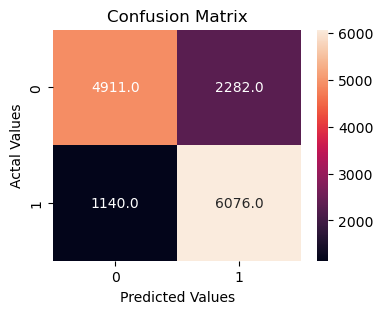

In [48]:
import matplotlib.pyplot as plt
import seaborn as sn
print(classification_report(Y_adasyn_test, Y_adasyn_pred_LR))

adasyn_cmLR = confusion_matrix(Y_adasyn_test, Y_adasyn_pred_LR)
plt.figure(figsize=(4,3))
sn.heatmap(adasyn_cmLR, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### KMeans

1
2
3
4
5
6
7
8
9
10


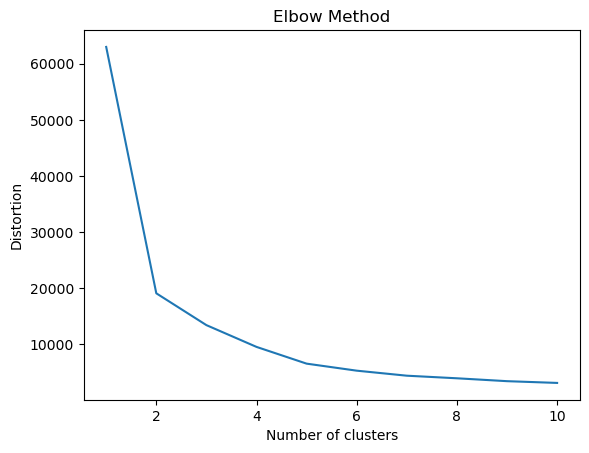

In [49]:
# Elbow Method
distortions = []
for i in range(1, 11):
    print(i)
    kmeansAD = KMeans(n_clusters=i, random_state=42)
    kmeansAD.fit(X_smote_train)
    distortions.append(kmeansAD.inertia_)

plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [50]:
kmeansAD = KMeans(n_clusters=2, random_state=42)
kmeansAD.fit(X_adasyn_train)
Y_kmeans_pred_AD = kmeansAD.predict(X_adasyn_test)
kmeans_adasyn_score = accuracy_score(Y_adasyn_test, Y_kmeans_pred_AD)
print(kmeans_adasyn_score)

0.5847040044416684


              precision    recall  f1-score   support

           0       0.55      0.86      0.67      7193
           1       0.69      0.31      0.43      7216

    accuracy                           0.58     14409
   macro avg       0.62      0.59      0.55     14409
weighted avg       0.62      0.58      0.55     14409



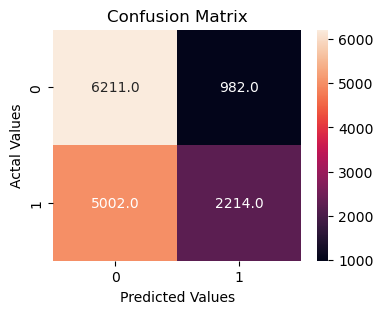

In [52]:
print(classification_report(Y_adasyn_test, Y_kmeans_pred_AD))

adasyn_cmKM = confusion_matrix(Y_adasyn_test, Y_kmeans_pred_AD)
plt.figure(figsize=(4,3))
sn.heatmap(adasyn_cmKM, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Cat Boost

In [53]:
cbmodelAD = CatBoostClassifier()
cbmodelAD.fit(X_adasyn_train, Y_adasyn_train)

Y_adasyn_pred_CB = cbmodel.predict(X_adasyn_test)
CB_adasyn_score = accuracy_score(Y_adasyn_test, Y_adasyn_pred_CB)
print(CB_adasyn_score)

Learning rate set to 0.058176
0:	learn: 0.6355176	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.5997715	total: 131ms	remaining: 1m 5s
2:	learn: 0.5682552	total: 195ms	remaining: 1m 4s
3:	learn: 0.5411474	total: 260ms	remaining: 1m 4s
4:	learn: 0.5144106	total: 316ms	remaining: 1m 2s
5:	learn: 0.4951756	total: 374ms	remaining: 1m 2s
6:	learn: 0.4791724	total: 440ms	remaining: 1m 2s
7:	learn: 0.4679698	total: 513ms	remaining: 1m 3s
8:	learn: 0.4539693	total: 599ms	remaining: 1m 5s
9:	learn: 0.4439524	total: 674ms	remaining: 1m 6s
10:	learn: 0.4342480	total: 777ms	remaining: 1m 9s
11:	learn: 0.4278954	total: 861ms	remaining: 1m 10s
12:	learn: 0.4200242	total: 952ms	remaining: 1m 12s
13:	learn: 0.4148486	total: 1.02s	remaining: 1m 11s
14:	learn: 0.4111146	total: 1.07s	remaining: 1m 10s
15:	learn: 0.4059541	total: 1.13s	remaining: 1m 9s
16:	learn: 0.4012216	total: 1.2s	remaining: 1m 9s
17:	learn: 0.3967779	total: 1.26s	remaining: 1m 8s
18:	learn: 0.3936210	total: 1.33s	remaining: 1m 8s
19:	lea

161:	learn: 0.3333952	total: 9.65s	remaining: 49.9s
162:	learn: 0.3333181	total: 9.71s	remaining: 49.9s
163:	learn: 0.3332083	total: 9.76s	remaining: 49.8s
164:	learn: 0.3330737	total: 9.81s	remaining: 49.7s
165:	learn: 0.3328761	total: 9.87s	remaining: 49.6s
166:	learn: 0.3327652	total: 9.93s	remaining: 49.5s
167:	learn: 0.3326154	total: 9.98s	remaining: 49.4s
168:	learn: 0.3325448	total: 10s	remaining: 49.3s
169:	learn: 0.3324433	total: 10.1s	remaining: 49.2s
170:	learn: 0.3323663	total: 10.1s	remaining: 49.1s
171:	learn: 0.3322692	total: 10.2s	remaining: 49s
172:	learn: 0.3321521	total: 10.2s	remaining: 48.9s
173:	learn: 0.3320043	total: 10.3s	remaining: 48.9s
174:	learn: 0.3318924	total: 10.4s	remaining: 48.8s
175:	learn: 0.3316360	total: 10.4s	remaining: 48.8s
176:	learn: 0.3315385	total: 10.5s	remaining: 48.7s
177:	learn: 0.3313787	total: 10.5s	remaining: 48.6s
178:	learn: 0.3311646	total: 10.6s	remaining: 48.6s
179:	learn: 0.3310923	total: 10.6s	remaining: 48.4s
180:	learn: 0.33

321:	learn: 0.3171989	total: 19.9s	remaining: 41.9s
322:	learn: 0.3171239	total: 20s	remaining: 41.8s
323:	learn: 0.3170387	total: 20s	remaining: 41.8s
324:	learn: 0.3169791	total: 20.1s	remaining: 41.8s
325:	learn: 0.3169263	total: 20.2s	remaining: 41.7s
326:	learn: 0.3168848	total: 20.2s	remaining: 41.7s
327:	learn: 0.3168012	total: 20.3s	remaining: 41.6s
328:	learn: 0.3167115	total: 20.4s	remaining: 41.6s
329:	learn: 0.3166359	total: 20.5s	remaining: 41.5s
330:	learn: 0.3165706	total: 20.5s	remaining: 41.5s
331:	learn: 0.3164679	total: 20.6s	remaining: 41.4s
332:	learn: 0.3163856	total: 20.7s	remaining: 41.4s
333:	learn: 0.3162964	total: 20.8s	remaining: 41.4s
334:	learn: 0.3162312	total: 20.9s	remaining: 41.4s
335:	learn: 0.3161614	total: 21s	remaining: 41.4s
336:	learn: 0.3160755	total: 21s	remaining: 41.4s
337:	learn: 0.3160068	total: 21.1s	remaining: 41.3s
338:	learn: 0.3159448	total: 21.2s	remaining: 41.3s
339:	learn: 0.3158709	total: 21.3s	remaining: 41.3s
340:	learn: 0.315734

480:	learn: 0.3064855	total: 31.4s	remaining: 33.8s
481:	learn: 0.3064155	total: 31.4s	remaining: 33.8s
482:	learn: 0.3063640	total: 31.5s	remaining: 33.7s
483:	learn: 0.3063210	total: 31.6s	remaining: 33.7s
484:	learn: 0.3062713	total: 31.6s	remaining: 33.6s
485:	learn: 0.3062314	total: 31.7s	remaining: 33.5s
486:	learn: 0.3061874	total: 31.8s	remaining: 33.5s
487:	learn: 0.3061347	total: 31.9s	remaining: 33.4s
488:	learn: 0.3060658	total: 31.9s	remaining: 33.4s
489:	learn: 0.3060193	total: 32s	remaining: 33.3s
490:	learn: 0.3059351	total: 32.1s	remaining: 33.2s
491:	learn: 0.3058933	total: 32.1s	remaining: 33.2s
492:	learn: 0.3058343	total: 32.2s	remaining: 33.1s
493:	learn: 0.3057795	total: 32.3s	remaining: 33.1s
494:	learn: 0.3057401	total: 32.3s	remaining: 33s
495:	learn: 0.3056857	total: 32.4s	remaining: 32.9s
496:	learn: 0.3056417	total: 32.5s	remaining: 32.9s
497:	learn: 0.3056058	total: 32.6s	remaining: 32.8s
498:	learn: 0.3055603	total: 32.6s	remaining: 32.8s
499:	learn: 0.30

642:	learn: 0.2981815	total: 42.8s	remaining: 23.8s
643:	learn: 0.2981555	total: 42.9s	remaining: 23.7s
644:	learn: 0.2981281	total: 43s	remaining: 23.6s
645:	learn: 0.2980969	total: 43s	remaining: 23.6s
646:	learn: 0.2980620	total: 43.1s	remaining: 23.5s
647:	learn: 0.2980318	total: 43.2s	remaining: 23.4s
648:	learn: 0.2980033	total: 43.2s	remaining: 23.4s
649:	learn: 0.2979320	total: 43.3s	remaining: 23.3s
650:	learn: 0.2979044	total: 43.4s	remaining: 23.2s
651:	learn: 0.2978455	total: 43.4s	remaining: 23.2s
652:	learn: 0.2978110	total: 43.5s	remaining: 23.1s
653:	learn: 0.2977779	total: 43.6s	remaining: 23.1s
654:	learn: 0.2977387	total: 43.7s	remaining: 23s
655:	learn: 0.2976965	total: 43.7s	remaining: 22.9s
656:	learn: 0.2976623	total: 43.8s	remaining: 22.9s
657:	learn: 0.2976134	total: 43.9s	remaining: 22.8s
658:	learn: 0.2975953	total: 43.9s	remaining: 22.7s
659:	learn: 0.2975542	total: 44s	remaining: 22.7s
660:	learn: 0.2975199	total: 44.1s	remaining: 22.6s
661:	learn: 0.297496

802:	learn: 0.2923266	total: 54s	remaining: 13.3s
803:	learn: 0.2923071	total: 54.1s	remaining: 13.2s
804:	learn: 0.2922390	total: 54.2s	remaining: 13.1s
805:	learn: 0.2921866	total: 54.2s	remaining: 13.1s
806:	learn: 0.2921680	total: 54.3s	remaining: 13s
807:	learn: 0.2921406	total: 54.4s	remaining: 12.9s
808:	learn: 0.2921280	total: 54.4s	remaining: 12.9s
809:	learn: 0.2921033	total: 54.5s	remaining: 12.8s
810:	learn: 0.2920703	total: 54.6s	remaining: 12.7s
811:	learn: 0.2920545	total: 54.7s	remaining: 12.7s
812:	learn: 0.2920364	total: 54.7s	remaining: 12.6s
813:	learn: 0.2920068	total: 54.8s	remaining: 12.5s
814:	learn: 0.2919831	total: 54.9s	remaining: 12.5s
815:	learn: 0.2919625	total: 54.9s	remaining: 12.4s
816:	learn: 0.2919250	total: 55s	remaining: 12.3s
817:	learn: 0.2919008	total: 55.1s	remaining: 12.3s
818:	learn: 0.2918518	total: 55.1s	remaining: 12.2s
819:	learn: 0.2918264	total: 55.2s	remaining: 12.1s
820:	learn: 0.2918035	total: 55.3s	remaining: 12.1s
821:	learn: 0.2917

964:	learn: 0.2875369	total: 1m 5s	remaining: 2.38s
965:	learn: 0.2875139	total: 1m 5s	remaining: 2.31s
966:	learn: 0.2874775	total: 1m 5s	remaining: 2.24s
967:	learn: 0.2874451	total: 1m 5s	remaining: 2.18s
968:	learn: 0.2874371	total: 1m 5s	remaining: 2.11s
969:	learn: 0.2874174	total: 1m 5s	remaining: 2.04s
970:	learn: 0.2873871	total: 1m 6s	remaining: 1.97s
971:	learn: 0.2873550	total: 1m 6s	remaining: 1.91s
972:	learn: 0.2873309	total: 1m 6s	remaining: 1.84s
973:	learn: 0.2873085	total: 1m 6s	remaining: 1.77s
974:	learn: 0.2872914	total: 1m 6s	remaining: 1.7s
975:	learn: 0.2872521	total: 1m 6s	remaining: 1.63s
976:	learn: 0.2872243	total: 1m 6s	remaining: 1.56s
977:	learn: 0.2871879	total: 1m 6s	remaining: 1.5s
978:	learn: 0.2871657	total: 1m 6s	remaining: 1.43s
979:	learn: 0.2871329	total: 1m 6s	remaining: 1.36s
980:	learn: 0.2870956	total: 1m 6s	remaining: 1.29s
981:	learn: 0.2870684	total: 1m 6s	remaining: 1.23s
982:	learn: 0.2870429	total: 1m 6s	remaining: 1.16s
983:	learn: 0.

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      7193
           1       0.83      0.76      0.79      7216

    accuracy                           0.80     14409
   macro avg       0.80      0.80      0.80     14409
weighted avg       0.80      0.80      0.80     14409



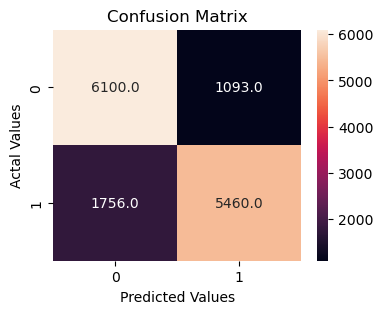

In [54]:
print(classification_report(Y_adasyn_test, Y_adasyn_pred_CB))

adasyn_cmCB = confusion_matrix(Y_adasyn_test, Y_adasyn_pred_CB)
plt.figure(figsize=(4,3))
sn.heatmap(adasyn_cmCB, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### CNN

In [55]:
X_cnn_adasyn_train = X_adasyn_train.values.reshape(57633, 300, 1)
X_cnn_adasyn_train.shape

(57633, 300, 1)

In [56]:
X_cnn_adasyn_test = X_adasyn_test.values.reshape(14409, 300, 1)
X_cnn_adasyn_test.shape

(14409, 300, 1)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Input, Embedding, GlobalMaxPooling1D, LeakyReLU, Dropout, MaxPool1D, Bidirectional, TimeDistributed

In [67]:
cnnmodel = Sequential()
cnnmodel.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_cnn_adasyn_train.shape[1],1)))
cnnmodel.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnnmodel.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
cnnmodel.add(Dense(units = 1, activation='sigmoid'))

cnnmodel.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 300, 32)           128       
                                                                 
 conv1d_13 (Conv1D)          (None, 300, 64)           6208      
                                                                 
 conv1d_14 (Conv1D)          (None, 300, 128)          24704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 150, 128)         0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 150, 128)          0         
                                                                 
 flatten_4 (Flatten)         (None, 19200)             0         
                                                      

In [68]:
cnnmodel_history_ADASYN = cnnmodel.fit(X_cnn_adasyn_train, Y_adasyn_train, epochs=2, batch_size = 100, validation_data = (X_cnn_adasyn_test, Y_adasyn_test))

Epoch 1/2
577/577 [==============================] - 112s 190ms/step - loss: 0.5552 - accuracy: 0.7205 - val_loss: 0.5234 - val_accuracy: 0.7681
Epoch 2/2
577/577 [==============================] - 108s 188ms/step - loss: 0.4760 - accuracy: 0.7635 - val_loss: 0.4545 - val_accuracy: 0.7819


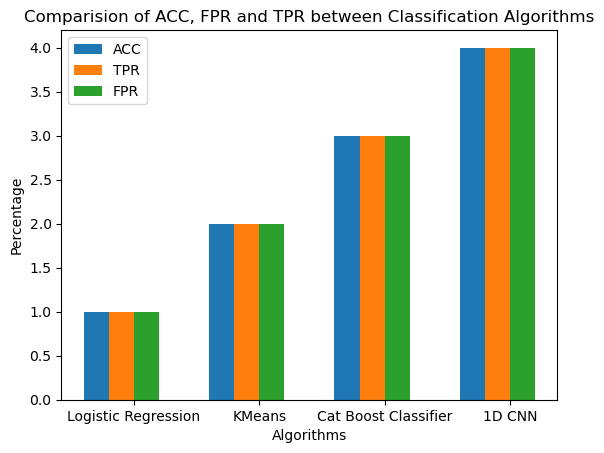

In [101]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Logistic Regression', 'KMeans', 'Cat Boost Classifier', '1D CNN']
ACC = [1,2,3,4]
TPR = [1,2,3,4]
FPR = [1,2,3,4]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, ACC, 0.2, label = 'ACC')
plt.bar(X_axis - 0.1, TPR, 0.2, label = 'TPR')
plt.bar(X_axis + 0.1, FPR, 0.2, label = 'FPR')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Comparision of ACC, FPR and TPR between Classification Algorithms")
plt.legend()
plt.show()
